In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

data_df = pd.read_csv(r'/datasets/deviation/PKU6/SCdata_deviationZ_medication_PKU6.csv')

In [3]:
data_df.head()

,ID,SC.109_centile,SC.109_deviationZ,SC.109_standard,SC.111_centile,SC.111_deviationZ,SC.111_standard,SC.116_centile,SC.116_deviationZ,SC.116_standard,...,RVPTH,RVPPH,SSTSSRT,SSTDEG,SSTDES,SWMBE,ICV.y,IA_delta,HI_delta,TO_delta
0,sub-C0001,0.053164,-1.614923,1.434078,0.400803,-0.251270,1.353465,0.554507,0.137058,1.327388,...,23.0,0.958333,206.125,1.0,5.0,NaN,1.524353e+06,11,15,26
1,sub-C0002,0.831273,0.959209,2.065536,0.741622,0.648354,1.537626,0.989819,2.319624,1.860843,...,23.0,0.958333,178.150,0.0,0.0,NaN,1.244910e+06,6,-1,5
2,sub-C0003,0.024181,-1.974175,1.402445,0.166954,-0.966272,1.180330,0.210186,-0.805777,1.179867,...,NaN,NaN,NaN,NaN,NaN,NaN,1.874938e+06,7,3,10
3,sub-C0004,0.782935,0.782144,2.213402,0.154129,-1.018883,1.153915,0.679944,0.467543,1.492594,...,22.0,0.916667,482.375,3.0,8.0,32.0,1.661273e+06,14,1,15
4,sub-C0005,0.494602,-0.013532,1.804500,0.572536,0.182833,1.456813,0.659586,0.411334,1.387687,...,12.0,0.500000,307.350,2.0,7.0,NaN,1.367399e+06,1,-1,0


In [5]:
columns = ["SC.109_deviationZ", "SC.120_deviationZ", "SC.59_deviationZ", "SC.65_deviationZ", "SC.79_deviationZ", "SC.84_deviationZ" ]
predict_label = ["IA_delta", "HI_delta"]

In [6]:
data_df[predict_label].describe()

,IA_delta,HI_delta
count,99.000000,99.000000
mean,7.080808,4.686869
std,5.891323,5.410961
min,-9.000000,-9.000000
25%,3.500000,1.000000
50%,7.000000,4.000000
75%,10.500000,8.000000
max,24.000000,20.000000


(array([ 2.,  1.,  9., 25., 14., 23., 16.,  3.,  5.,  1.]),
 array([-9. , -5.7, -2.4,  0.9,  4.2,  7.5, 10.8, 14.1, 17.4, 20.7, 24. ]),
 <BarContainer object of 10 artists>)

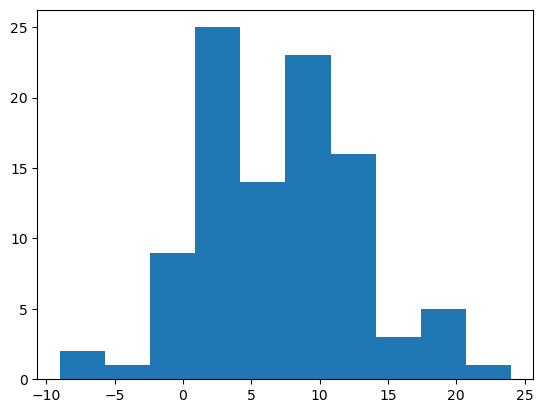

In [9]:
plt.hist(data_df["IA_delta"])

(array([ 1.,  3., 10., 23., 23., 18.,  8.,  9.,  1.,  3.]),
 array([-9. , -6.1, -3.2, -0.3,  2.6,  5.5,  8.4, 11.3, 14.2, 17.1, 20. ]),
 <BarContainer object of 10 artists>)

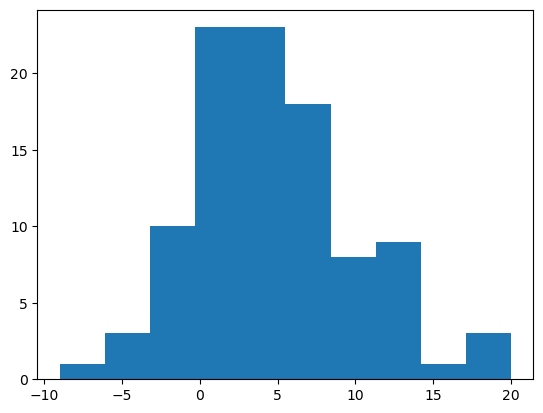

In [10]:
plt.hist(data_df["HI_delta"])

In [13]:
columns = [item for item in data_df.columns if item.endswith('deviationZ')]
columns

['SC.109_deviationZ',
 'SC.111_deviationZ',
 'SC.116_deviationZ',
 'SC.118_deviationZ',
 'SC.119_deviationZ',
 'SC.120_deviationZ',
 'SC.18_deviationZ',
 'SC.57_deviationZ',
 'SC.59_deviationZ',
 'SC.60_deviationZ',
 'SC.65_deviationZ',
 'SC.70_deviationZ',
 'SC.79_deviationZ',
 'SC.84_deviationZ',
 'SC.8_deviationZ',
 'SC.93_deviationZ',
 'SC.98_deviationZ']

In [14]:
data_df[columns].describe()

,SC.109_deviationZ,SC.111_deviationZ,SC.116_deviationZ,SC.118_deviationZ,SC.119_deviationZ,SC.120_deviationZ,SC.18_deviationZ,SC.57_deviationZ,SC.59_deviationZ,SC.60_deviationZ,SC.65_deviationZ,SC.70_deviationZ,SC.79_deviationZ,SC.84_deviationZ,SC.8_deviationZ,SC.93_deviationZ,SC.98_deviationZ
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.017408,-0.051692,0.008774,-0.106085,-0.271965,-0.284819,-0.017394,-0.220969,-0.310786,0.015476,-0.384604,0.009004,0.267664,-0.016112,0.050575,-0.153167,-0.066372
std,1.145147,1.059139,0.942248,1.350088,1.279755,1.237763,1.011775,0.874828,1.003621,0.878013,0.926522,0.928531,0.899973,0.982550,0.772344,0.939932,0.984202
min,-2.292201,-2.182546,-2.214109,-2.912953,-5.164542,-3.476746,-3.127703,-3.257941,-2.589045,-1.582689,-2.577787,-2.234344,-1.920805,-2.586472,-2.208209,-3.208857,-4.330881
25%,-0.914133,-0.820599,-0.481820,-1.148163,-1.024612,-1.092330,-0.620352,-0.772221,-0.955326,-0.589201,-1.005764,-0.532565,-0.300005,-0.605662,-0.483057,-0.601464,-0.709388
50%,-0.013532,-0.123828,0.006375,-0.093416,-0.330175,-0.404448,-0.068162,-0.181818,-0.459302,-0.244915,-0.294403,0.106307,0.223654,-0.038239,0.099735,-0.121109,-0.019962
75%,0.826350,0.602714,0.448311,0.896329,0.580235,0.434550,0.749807,0.269564,0.583500,0.717274,0.319189,0.580242,0.897897,0.773163,0.546607,0.494130,0.585966
max,3.656586,2.235269,2.469523,3.212551,2.806229,3.311897,2.163452,1.814539,1.748791,2.334736,1.878446,2.347700,2.209482,2.567248,1.933119,2.002155,2.274351
